In [1]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('banana.csv')

In [3]:
data.shape

(48, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Group      48 non-null     object 
 1   pH         48 non-null     float64
 2   TSS        48 non-null     float64
 3   L.         48 non-null     float64
 4   a.         48 non-null     float64
 5   b.         48 non-null     float64
 6   WHC40      48 non-null     float64
 7   WHC60      48 non-null     float64
 8   WHC80      48 non-null     float64
 9   OHC40      48 non-null     float64
 10  OHC60      48 non-null     float64
 11  OHC80      48 non-null     float64
 12  Viscosity  48 non-null     float64
 13  Texture    48 non-null     float64
dtypes: float64(13), object(1)
memory usage: 5.4+ KB


In [5]:
data.head()

,Group,pH,TSS,L.,a.,b.,WHC40,WHC60,WHC80,OHC40,OHC60,OHC80,Viscosity,Texture
0,Gpe,4.64,1.83,45.16,5.28,21.01,5.15,5.21,5.70,0.78,0.68,1.10,60.07,32.70
1,Gpe,4.32,1.73,43.10,6.03,23.02,5.16,4.87,5.97,0.78,0.77,1.06,46.90,34.16
2,Gpe,4.60,1.77,44.72,6.42,23.38,5.03,5.14,5.65,0.79,0.75,1.17,55.70,33.88
3,Gpe,4.59,1.57,37.82,5.89,21.35,5.15,4.95,6.16,0.76,0.75,1.02,49.97,37.06
4,Gpe,4.55,1.53,38.64,5.67,24.30,5.20,5.37,6.50,0.74,0.78,0.95,58.83,37.26


In [6]:
data.Group.value_counts()

Group
Gpe    12
Rpe    12
Gpu    12
Rpu    12
Name: count, dtype: int64

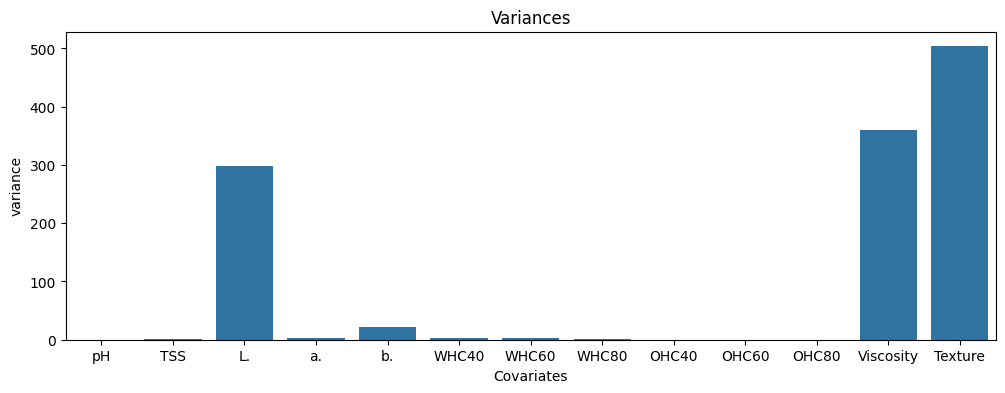

In [7]:
plt.figure(figsize=(12,4))
std_data=data.describe().iloc[2].reset_index().rename(columns={'index':'Covariates'})
std_data['variance'] = np.square(std_data['std'])
sns.barplot(std_data,x='Covariates',y='variance')
plt.title('Variances') #Some variances  are much larger than others hence the need for scaling
# plt.show()
plt.savefig('Variance')

Text(0.5, 1.0, 'Standard Deviation')

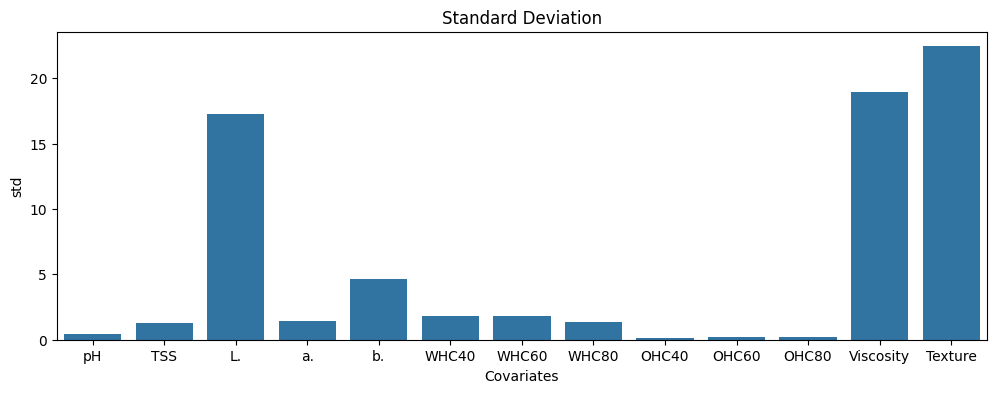

In [8]:
plt.figure(figsize=(12,4))
sns.barplot(std_data,x='Covariates',y='std')
plt.title('Standard Deviation')

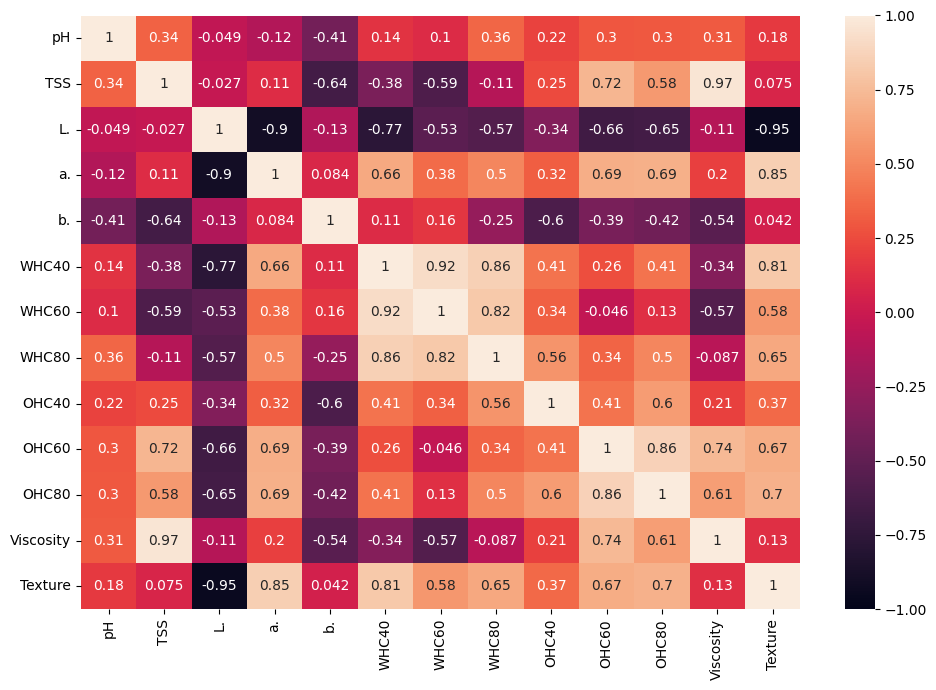

In [9]:
plt.figure(figsize=(10,7))
cor_cols=[col for col in data.columns if col not in 'Group']
sns.heatmap(data[cor_cols].corr(),annot=True,vmin=-1,vmax=1) #visualize correlation of independent varibales 
plt.tight_layout()
plt.savefig('Correlation.jpg')

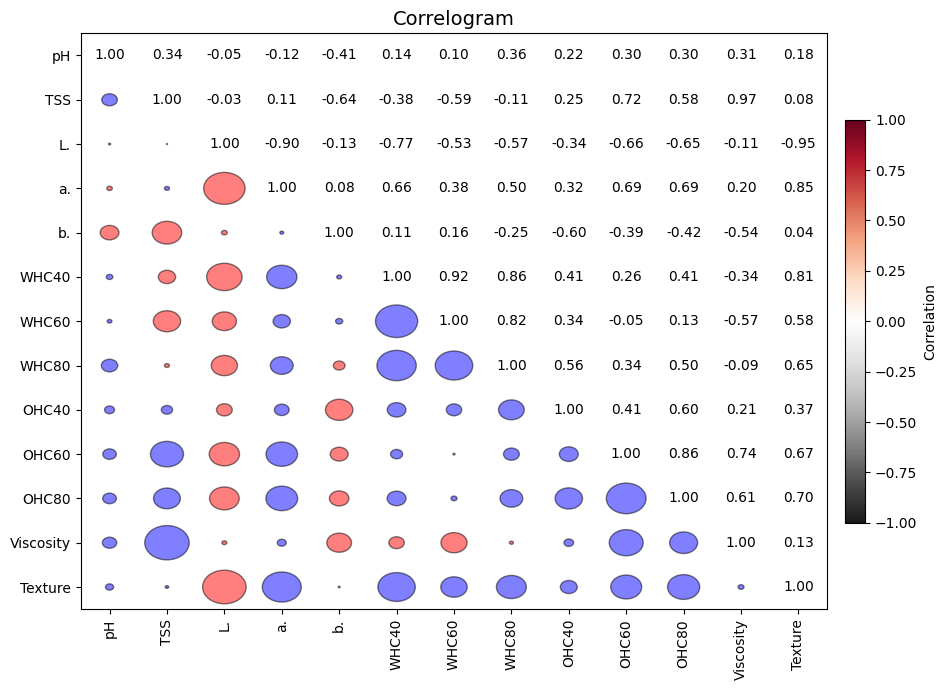

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

corr = data[cor_cols].corr()

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 7))

# Draw background grid
ax.set_xlim(0, len(corr))
ax.set_ylim(0, len(corr))
ax.invert_yaxis()
ax.set_xticks(np.arange(len(corr)) + 0.5)
ax.set_yticks(np.arange(len(corr)) + 0.5)
ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticklabels(corr.columns)

# Draw text in upper triangle
for i in range(len(corr)):
    for j in range(i, len(corr)):
        value = corr.iloc[i, j]
        ax.text(j + 0.5, i + 0.5, f'{value:.2f}', va='center', ha='center', color='black')

# Draw circles in lower triangle
for i in range(1, len(corr)):
    for j in range(0, i):
        value = corr.iloc[i, j]
        radius = np.abs(value) * 0.4  # Scale for visibility
        color = 'red' if value < 0 else 'blue'
        circle = plt.Circle((j + 0.5, i + 0.5), radius, color=color, alpha=0.5, ec='k')
        ax.add_patch(circle)

# Add colorbar manually (optional)
sm = plt.cm.ScalarMappable(cmap='RdGy_r', norm=plt.Normalize(vmin=-1, vmax=1))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, shrink=0.7, pad=0.02)
cbar.set_label("Correlation")

plt.title("Correlogram", fontsize=14)
plt.tight_layout()
plt.show()


### Modelling

In [11]:
from sklearn.utils import resample


# Display current class distribution
print("Original class distribution:\n", data['Group'].value_counts())

# Choose oversampling factor (e.g., triple each group)
oversample_factor = 20

# Group by class
grouped_data = {group: data[data['Group'] == group] for group in data['Group'].unique()}

# Perform oversampling for each group
oversampled = []

for group, data1 in grouped_data.items():
    resampled = resample(data1,
                         replace=True,
                         n_samples=len(data) * oversample_factor,
                         random_state=42)
    oversampled.append(resampled)

# Combine and shuffle the oversampled dataset
oversampled_df = pd.concat(oversampled).sample(frac=1, random_state=42).reset_index(drop=True)

# Check new class distribution
print("\nNew class distribution after uniform oversampling:\n", oversampled_df['Group'].value_counts())


Original class distribution:
 Group
Gpe    12
Rpe    12
Gpu    12
Rpu    12
Name: count, dtype: int64

New class distribution after uniform oversampling:
 Group
Gpe    960
Rpu    960
Gpu    960
Rpe    960
Name: count, dtype: int64


In [12]:
oversampled_df.head()

,Group,pH,TSS,L.,a.,b.,WHC40,WHC60,WHC80,OHC40,OHC60,OHC80,Viscosity,Texture
0,Gpe,5.31,1.80,48.73,3.79,26.58,4.34,5.53,5.15,0.73,0.71,1.03,55.03,38.80
1,Rpu,5.04,4.30,67.12,3.87,15.93,1.54,1.88,4.83,0.79,0.83,1.11,86.97,2.08
2,Rpu,5.21,4.40,74.86,2.42,12.97,1.24,1.63,4.59,0.83,0.80,1.04,87.70,2.30
3,Gpu,5.65,1.37,76.62,1.68,19.29,3.74,5.79,6.43,0.73,0.45,0.79,44.67,0.68
4,Rpe,5.58,3.53,39.95,5.57,12.81,6.55,6.20,7.84,0.90,1.02,1.29,66.80,57.61


In [13]:
shuffled_data = oversampled_df.sample(frac=1,random_state=200).reset_index(drop=True)
shuffled_data

,Group,pH,TSS,L.,a.,b.,WHC40,WHC60,WHC80,OHC40,OHC60,OHC80,Viscosity,Texture
0,Gpu,5.65,1.37,76.62,1.68,19.29,3.74,5.79,6.43,0.73,0.45,0.79,44.67,0.68
1,Gpu,4.49,1.07,70.97,3.15,15.57,3.83,5.56,6.07,0.91,0.54,0.87,35.07,0.54
2,Gpe,4.33,1.67,39.85,5.36,23.73,4.99,5.53,6.00,0.80,0.77,1.02,57.53,38.02
3,Rpe,5.47,3.63,40.37,6.34,14.01,6.34,5.59,7.88,0.81,1.05,1.31,72.73,59.93
4,Rpe,5.65,3.57,39.29,5.98,12.79,6.16,6.23,8.29,1.00,0.97,1.30,79.40,47.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3835,Gpu,5.58,1.27,74.78,1.86,19.54,3.93,5.58,6.43,0.71,0.43,0.71,42.53,0.70
3836,Gpe,5.31,1.80,48.73,3.79,26.58,4.34,5.53,5.15,0.73,0.71,1.03,55.03,38.80
3837,Rpe,5.65,3.47,36.68,5.72,12.08,5.94,6.47,8.31,0.78,1.00,1.21,82.90,59.92
3838,Gpe,5.26,1.90,34.83,4.89,21.45,5.03,4.82,5.64,0.72,0.78,0.97,54.87,40.91


In [14]:
X = shuffled_data.drop('Group',axis=1)
y=shuffled_data.Group 

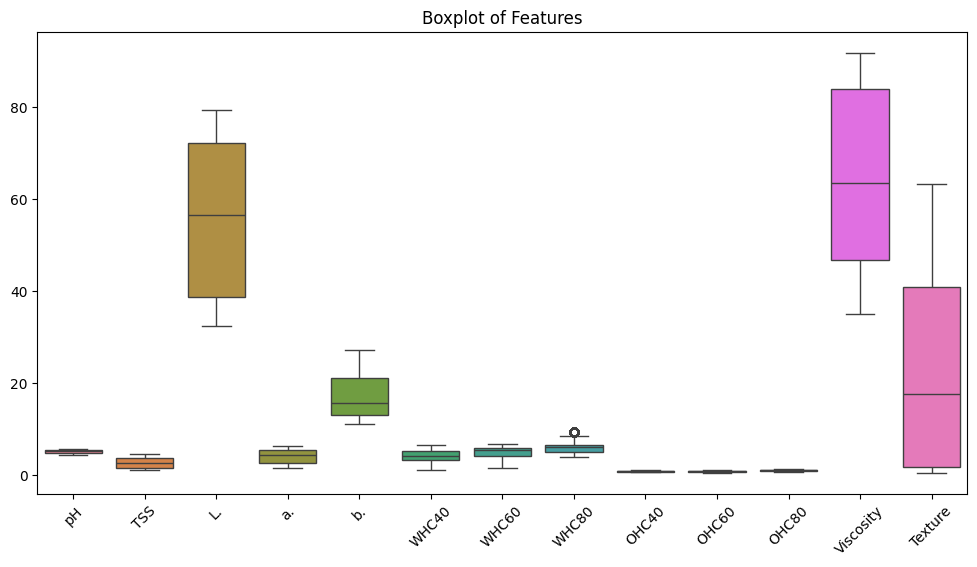

In [15]:
# Visualize original features
plt.figure(figsize=(12, 6))
sns.boxplot(data=X)  # scaled_data assumed to be normalized
plt.title('Boxplot of Features')
plt.xticks(rotation=45)
plt.show()


In [16]:
from sklearn.preprocessing import StandardScaler 
#scale data to avoid overfiiting and for the PCA analysis 
scaler=StandardScaler()

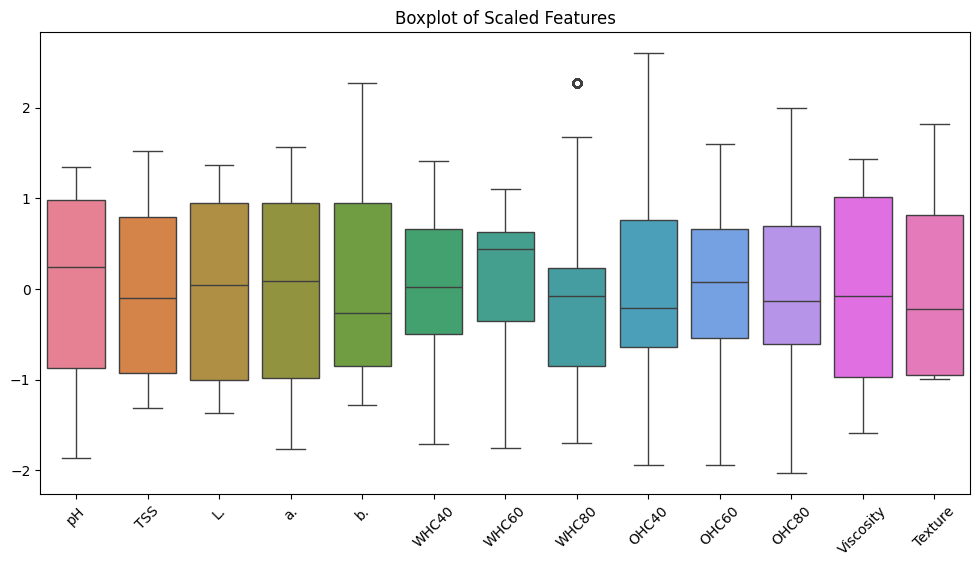

In [17]:

X_scaled = scaler.fit_transform(X)
scaled_df=pd.DataFrame(X_scaled,columns=X.columns)

# Visualize original features
plt.figure(figsize=(12, 6))
sns.boxplot(data=scaled_df)  # scaled_data assumed to be normalized
plt.title('Boxplot of Scaled Features')
plt.xticks(rotation=45)
plt.savefig('scaled_features_boxplot')


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
y = le.fit_transform(y)

X_train,X_test,y_train,y_test = train_test_split(X,y, stratify=y, test_size=0.2 , random_state=42)

In [19]:
X_train.shape

(3072, 13)

In [20]:
# Apply SMOTE for multi-class oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [21]:
X_train_smote.shape

(3072, 13)

In [22]:
clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [23]:
svc = SVC(kernel='linear',C=0.1)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [24]:
clf.score(X_test,y_test)

0.978775240951698

In [25]:
mean_squared_error(y_test,y_pred)

0.0

In [26]:
svc.score(X_test,y_test)

1.0

In [27]:
# y_pred

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       192
           2       1.00      1.00      1.00       192
           3       1.00      1.00      1.00       192

    accuracy                           1.00       768
   macro avg       1.00      1.00      1.00       768
weighted avg       1.00      1.00      1.00       768



In [29]:
confusion_matrix(y_test,y_pred)

array([[192,   0,   0,   0],
       [  0, 192,   0,   0],
       [  0,   0, 192,   0],
       [  0,   0,   0, 192]])

### PCA

In [30]:

# Apply PCA (retain 95% variance)
pca = PCA(0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Train/test split
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)


In [31]:
X_train_pca

array([[ 0.73950327, -1.55770949,  2.09096648, -0.52820303,  0.33459328],
       [ 3.60411097,  0.33811453, -0.8306174 ,  0.19112184, -0.57099958],
       [ 3.61759731,  0.82306953, -0.94547851, -0.56382841, -0.10611868],
       ...,
       [-1.30485275,  2.19930444,  1.9173805 , -0.38229781, -0.04964273],
       [ 4.08642473,  0.68816432, -1.15743761, -0.11366258,  0.39931768],
       [-0.49370264, -1.58905586,  1.30812664,  1.52138973,  1.02769229]],
      shape=(3072, 5))

In [32]:
clf = SVC()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)

In [33]:
clf.score(X_test_pca,y_test)

1.0

In [34]:
pca.n_components_

np.int64(5)

In [35]:
pca_df=pd.DataFrame(X_pca, columns=[f'PCA{i+1}' for i in range(pca.n_components_)])

In [36]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance= pca.explained_variance_ratio_.cumsum()

In [37]:
pca_df['target'] = y
pca_df

,PCA1,PCA2,PCA3,PCA4,PCA5,target
0,-2.814142,-1.688105,-1.793607,1.507478,-0.006393,1
1,-1.948786,-1.837506,-1.151360,-1.967589,0.153549,1
2,0.454539,-1.938767,2.038322,-0.782856,0.067760,0
3,3.743205,0.455840,0.303053,0.808587,-0.677509,2
4,4.086425,0.688164,-1.157438,-0.113663,0.399318,2
...,...,...,...,...,...,...
3835,-3.031803,-1.974329,-1.591169,1.531753,-0.183992,1
3836,-0.493703,-1.589056,1.308127,1.521390,1.027692,0
3837,3.581122,0.461118,-0.272936,1.329831,-1.124063,2
3838,0.349172,-1.363084,1.375864,1.233829,0.351366,0


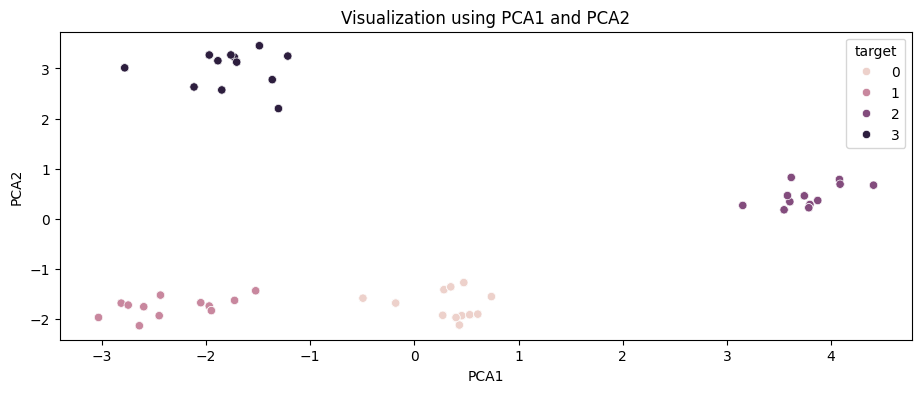

In [38]:
plt.figure(figsize=(11,4))
sns.scatterplot(x='PCA1',y='PCA2',data=pca_df, hue='target')
plt.title('Visualization using PCA1 and PCA2')
plt.savefig('Visualization.jpg')

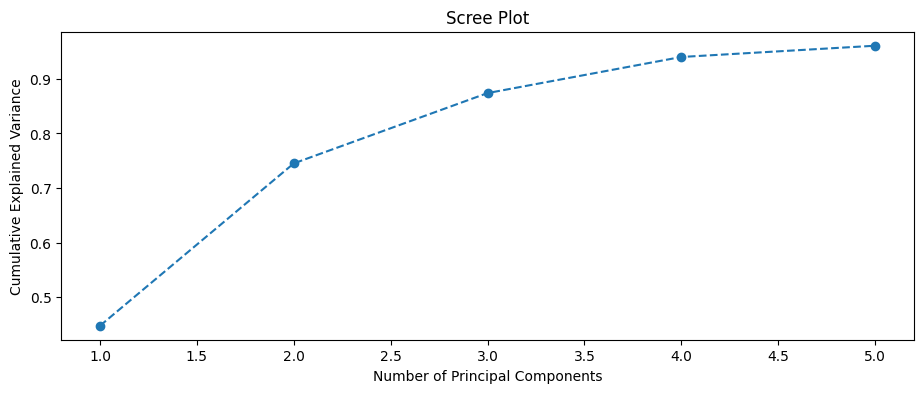

In [39]:
import numpy as np

plt.figure(figsize=(11, 4))
plt.plot(np.arange(1, len(explained_variance) + 1), cumulative_variance, marker="o", linestyle="--")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot")
plt.savefig('Screeplot.jpg')


In [40]:
pca.explained_variance_ratio_.cumsum()

array([0.44792223, 0.74511579, 0.87384153, 0.93994442, 0.9605643 ])

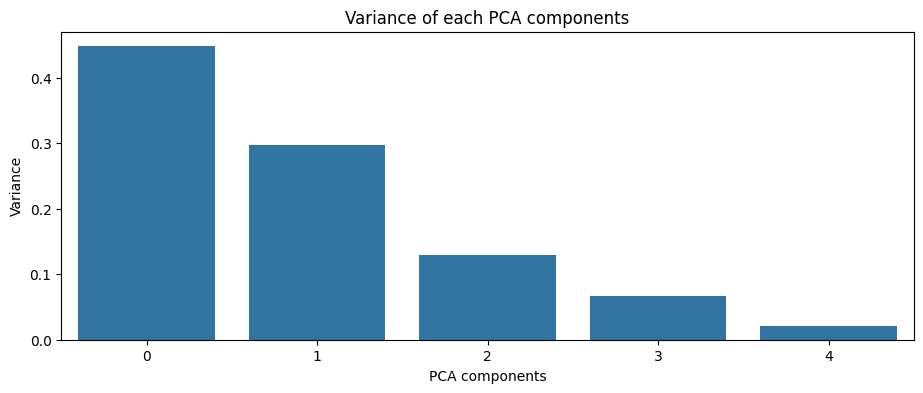

In [41]:
plt.figure(figsize=(11, 4))
sns.barplot(explained_variance)
plt.ylabel('Variance')
plt.xlabel('PCA components')
plt.title('Variance of each PCA components')
plt.show()

### Projection 

In [42]:
sample = data.sample(1).iloc[[0]]          # <-- Keep it as a DataFrame
data_reduced = data.sample(1).iloc[[0]].drop(columns='Group').reset_index(drop=True)

In [43]:
sample

,Group,pH,TSS,L.,a.,b.,WHC40,WHC60,WHC80,OHC40,OHC60,OHC80,Viscosity,Texture
14,Rpe,5.32,3.6,35.25,5.29,11.55,5.55,6.34,8.19,0.97,1.04,1.28,77.23,35.94


In [44]:
data_reduced.values + 0.5

array([[ 6.15,  1.87, 77.12,  2.18, 19.79,  4.24,  6.29,  6.93,  1.23,
         0.95,  1.29, 45.17,  1.18]])

In [45]:
# Example new sample (make sure it has the same number of features as training data)
new_sample = data_reduced.values  + 0.1 # fill in actual values

# Scale and project it to PCA space
new_projection = pca.transform(scaler.transform(new_sample.reshape(1, -1)))


In [46]:
new_projection

array([[-2.03281976, -1.32150366, -2.16414655,  1.08980484,  0.70673401]])

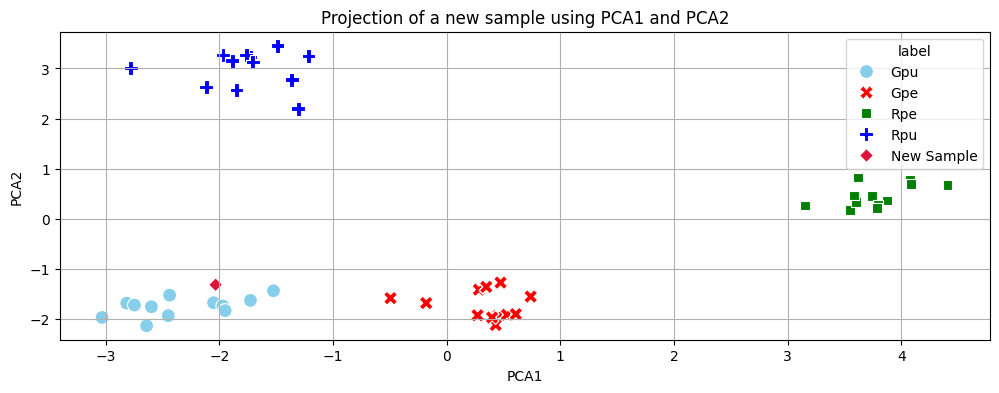

In [49]:

# Create a DataFrame for the new projected sample
new_point_df = pd.DataFrame({
    'PCA1': [new_projection[0, 0]],
    'PCA2': [new_projection[0, 1]],
    'label': ['New Sample']
})

# Add label to original data for legend grouping
pca_df['label'] = le.inverse_transform(y)

custom_palette = {'Gpu': 'skyblue','Gpe':'red','Rpu':'blue','Rpe':'green', 'New Sample': 'crimson'}

# Combine both for plotting
combined_df = pd.concat([pca_df[['PCA1', 'PCA2', 'label']], new_point_df])

# Plot with seaborn
plt.figure(figsize=(12,4))
sns.scatterplot(data=combined_df, x='PCA1', y='PCA2', hue='label', style='label', s=100,palette=custom_palette)

# Add labels and titles
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Projection of a new sample using PCA1 and PCA2')
plt.grid(True)
plt.savefig('Projection.jpg')